In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
C = np.loadtxt("MYDAL2_M_CLD_FR_2020-07-01_rgb_1440x720.CSV",delimiter =",")
C[C>1] = np.nan
C = np.flipud(C)
y = np.linspace(-90,90,C.shape[0])
x = np.linspace(-180,180,C.shape[1])

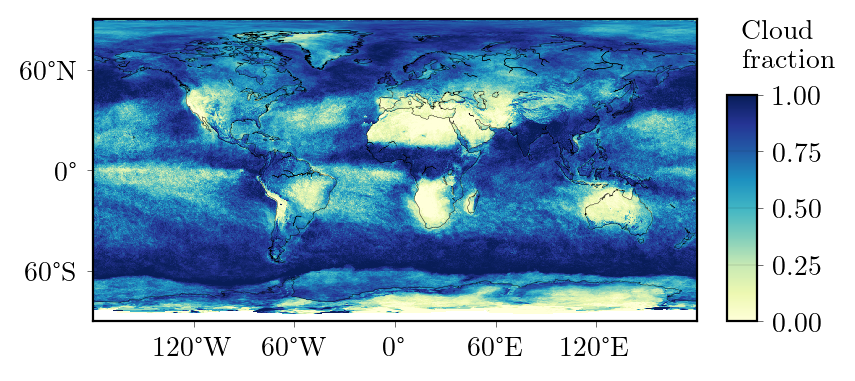

In [21]:
height = 2
width  = 2*height

plt.style.use("kitish")
fig, ax = plt.subplots(figsize=(width,height), constrained_layout=False)



map = Basemap()#projection='moll',lon_0=0)
map.drawcoastlines(linewidth = 0.15,color = "black",zorder = +2)
#map.shadedrelief(zorder =0,rasterized=True)
im = ax.pcolormesh(x,y,C,alpha = 1.0,zorder = +1,cmap ="YlGnBu",shading ="auto",rasterized=True)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="75%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0.0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
cbar = fig.colorbar(im,cax=axins,orientation="vertical")
cbar.ax.set_title("Cloud\nfraction",horizontalalignment="left")
cbar.set_alpha(1)
cbar.draw_all()


t = True
ax.spines['top'].set_visible(t)
ax.spines['bottom'].set_visible(t)
ax.spines['left'].set_visible(t)
ax.spines['right'].set_visible(t)

ax.set_xticks([-120,-60,0,60,120])
ax.set_xticklabels(["${}$°".format(abs(x)) + "{}".format("W" if x<0 else "E" if x>0 else "") for x in [-120,-60,0,60,120]])
ax.set_yticks([-60,0,60])
ax.set_yticklabels(["${}$°".format(abs(x)) + "{}".format("S" if x<0 else "N" if x>0 else "") for x in[-60,0,60]])

plt.grid("on")
plt.savefig("v9cloudfraction.pdf",dpi = 400,bbox_inches = "tight")